In [47]:
# import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
# % config InlineBackend
%matplotlib inline

In [48]:
# read dataset in csv by read_csv,and shows the first 5 column in dataset
Netflix= pd.read_csv('netflix_titles.csv')
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Explor the data type at each series**
Most of the features in the dataset have an object type except the release_year which contains an integer type
shows_id
type: the project type movie or TV shows, 
title: name of the movie/TV show, 
Director : who produce the project ,
cast : the actors of the project , 
release year : when the project produced ,
rating :, 
listed_in: category of the project,
Description : the Kind of the movies/TV shows if it is family or action

In [49]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Convert string to date as a datetime using to_datetime 

In [50]:
Netflix['date_added'] = pd.to_datetime(Netflix['date_added'])
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Check the null value, the output shows the null value of a 6 feature : director, cast, date_added , rating and all of this in not significant for analysis 
the duratin and country may be used

In [51]:
Netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Check the count and unique of country column

In [52]:
Netflix.country.describe()

count              7976
unique              748
top       United States
freq               2818
Name: country, dtype: object

Fill the null values of country columns with mode  by fillna

In [53]:
fillna_=Netflix.country.mode()[0]
Netflix.country.fillna(fillna_, inplace=True)

Fill the null values of duration columns with mode by fillna

In [54]:
fillna_duration=Netflix.duration.mode()[0]
Netflix.duration.fillna(fillna_duration, inplace=True)

Fill the null values of rating column with mode by fillna

In [55]:
fillna_rating=Netflix.rating.mode()[0]
Netflix.rating.fillna(fillna_rating, inplace=True)

Fill the null values of rating column with mode by fillna

In [56]:
fillna_date_added=Netflix.date_added.median()
Netflix.date_added.fillna(fillna_date_added, inplace=True)

Drop the columns that will not be used or not important

In [57]:
Netflix.drop(['cast', 'director'], axis='columns', inplace=True)

Check the null values after fillna 

In [58]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       8807 non-null   object        
 4   date_added    8807 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8807 non-null   object        
 7   duration      8807 non-null   object        
 8   listed_in     8807 non-null   object        
 9   description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 688.2+ KB


Which is the unique values of rating columns

In [59]:
Netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

Replace outlier with the most commn value

In [60]:
Netflix.rating.mode()

0    TV-MA
dtype: object

In [61]:
Netflix['rating']=Netflix['rating'].replace(['66 min','84 min','74 min'],'TV-MA')
Netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Sort the values of type and release_year columns

In [62]:
Netflix= Netflix.sort_values(['type', 'release_year'],
              ascending = [True, True])
Netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8763,s8764,Movie,WWII: Report from the Aleutians,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


Q1:What are the most popular type movies or TV shows

In [63]:
Netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

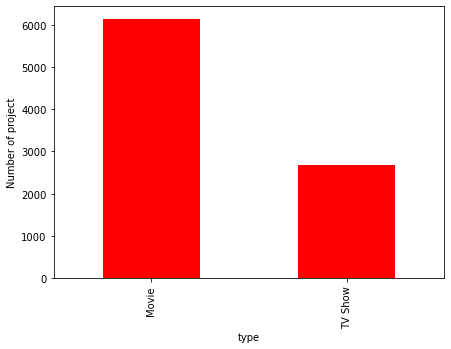

In [64]:
plt.figure(figsize=(7,5))
x= Netflix['type'].value_counts().plot(kind='bar',color='r')
#plt.title('')
plt.xlabel('type')
plt.ylabel('Number of project');

Q2:Has TV shows become more common in the last two years?

In [65]:
com = Netflix[Netflix['release_year'] > 2019]
df1= com[['type','release_year']]
df1

,type,release_year
0,Movie,2020
16,Movie,2020
78,Movie,2020
84,Movie,2020
103,Movie,2020
...,...,...
1460,TV Show,2021
1551,TV Show,2021
1696,TV Show,2021
2920,TV Show,2021


In [66]:
com2 = Netflix[Netflix['release_year'] < 2019]
df2= com2[['type','release_year']]
df2

,type,release_year
7790,Movie,1942
8205,Movie,1942
8660,Movie,1943
8739,Movie,1943
8763,Movie,1943
...,...,...
8604,TV Show,2018
8605,TV Show,2018
8646,TV Show,2018
8775,TV Show,2018


<AxesSubplot:ylabel='release_year'>

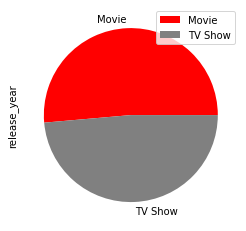

In [67]:
df1.groupby(['type']).sum().plot(kind='pie', y='release_year', colors=('r','Gray'))

<AxesSubplot:ylabel='release_year'>

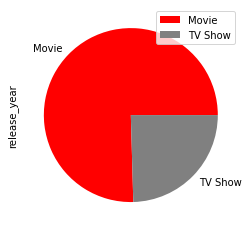

In [68]:
df2.groupby(['type']).sum().plot(kind='pie', y='release_year', colors=('r','Gray'))

Q3:In which country are the projects produced the most

In [69]:
Netflix.country.nunique()

748

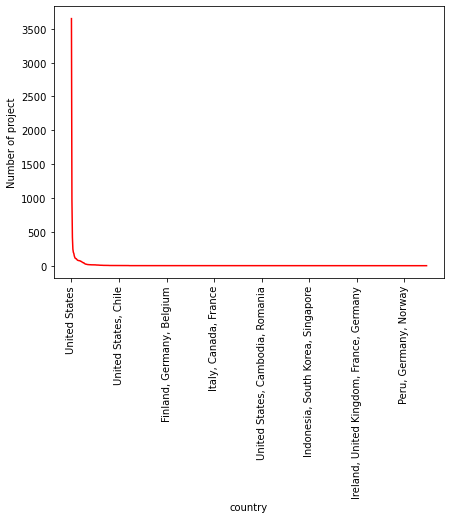

In [75]:
plt.figure(figsize=(7,5))
y= Netflix['country'].value_counts().plot(kind='line', color='r')
plt.xticks(rotation=90)
#plt.title('')
plt.xlabel('country')
plt.ylabel('Number of project');

Q4:What is the most popular category of movies and TV shows

In [71]:
Netflix.listed_in.nunique()

514

In [72]:
Netflix.listed_in.mode()

0    Dramas, International Movies
dtype: object

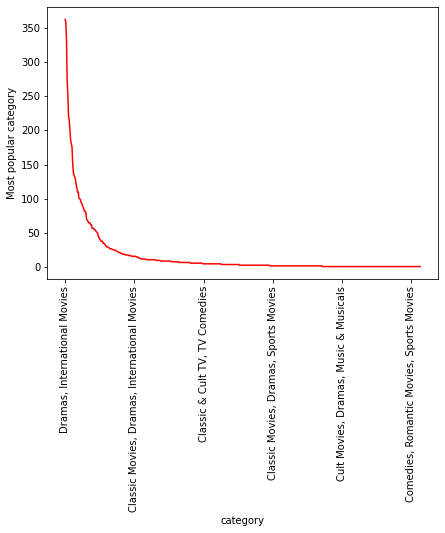

In [73]:
plt.figure(figsize=(7,5))
y= Netflix['listed_in'].value_counts().plot(kind='line', color='r')
plt.xticks(rotation=90)
#plt.title('')
plt.xlabel('category')
plt.ylabel('Most popular category');